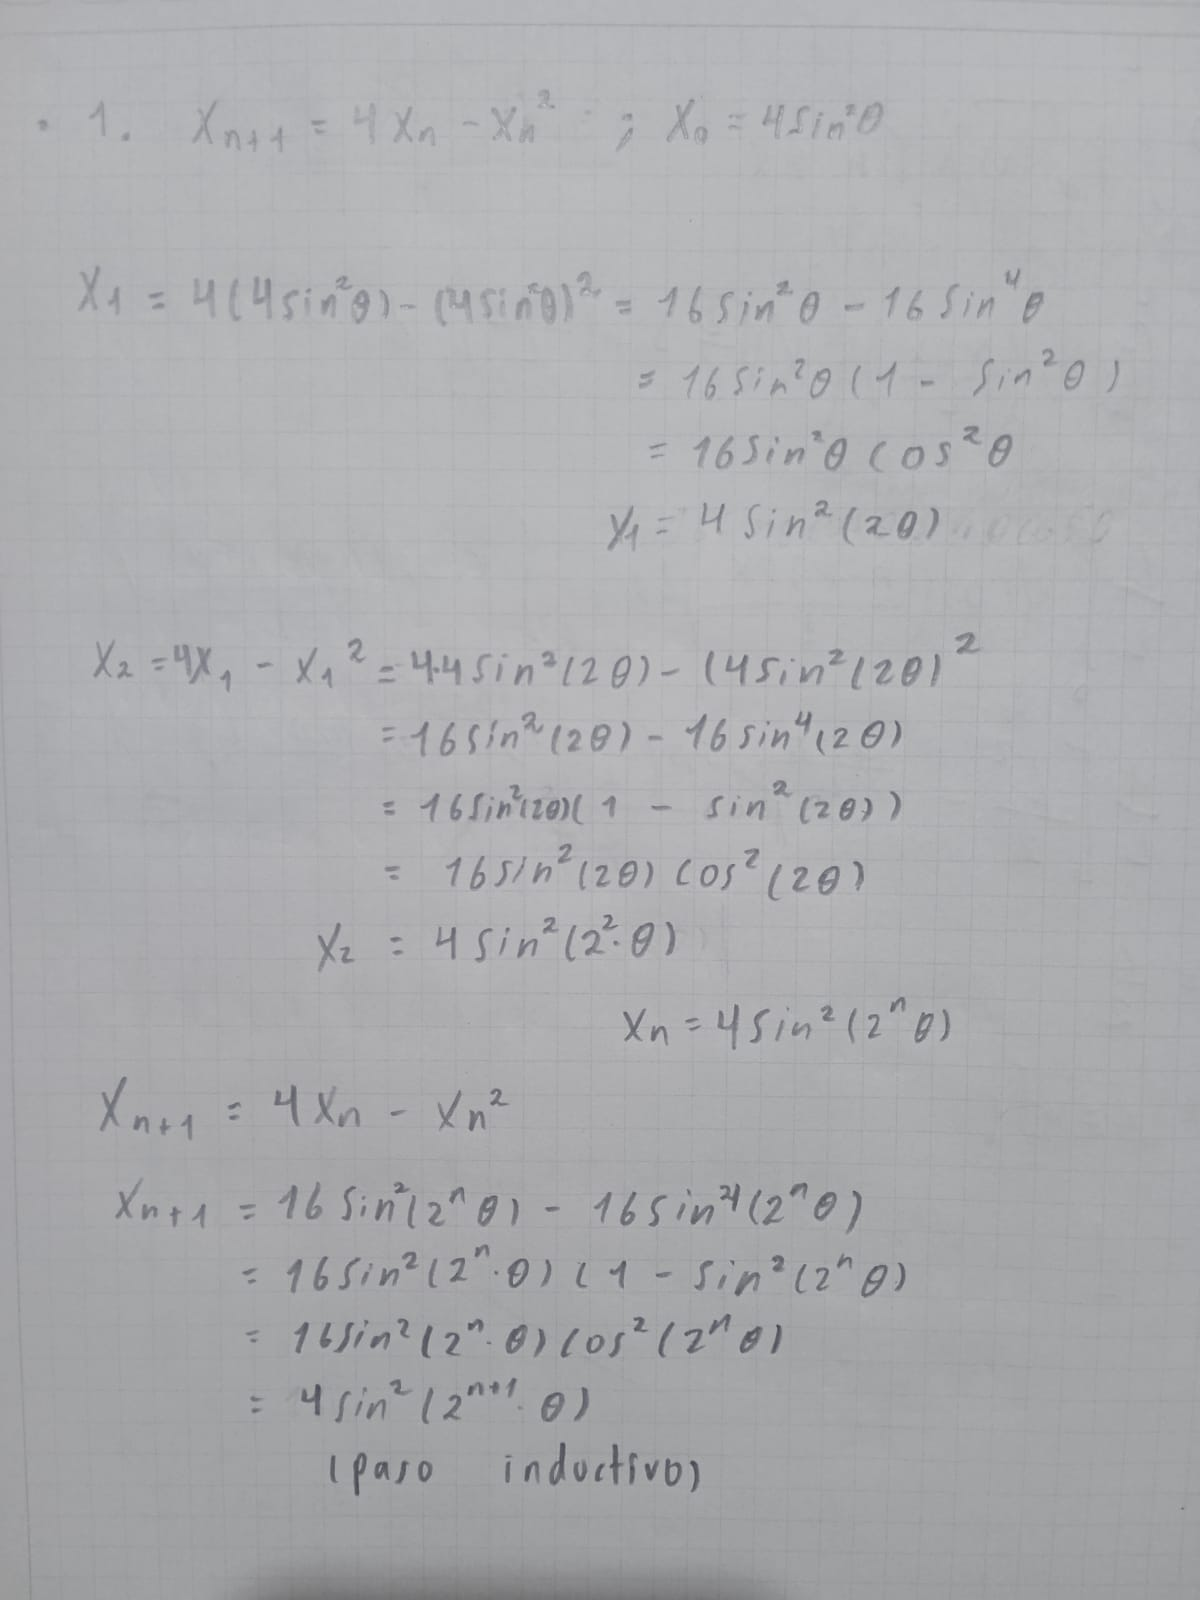


In [3]:
#2
import numpy as np

A = np.array([[3, -1, -1],
              [-1, 3, 1],
              [2, 1, 4]])

b = np.array([1, 3, 7])

x = np.zeros_like(b, dtype=np.float64)

max_iter = 100
tol = 1e-10

def gauss_seidel(A, b, x, max_iter, tol):
    n = len(b)
    for k in range(max_iter):
        x_old = np.copy(x)
        for i in range(n):
            sum1 = sum(A[i][j] * x[j] for j in range(i))
            sum2 = sum(A[i][j] * x_old[j] for j in range(i + 1, n))
            x[i] = (b[i] - sum1 - sum2) / A[i][i]

        error = np.linalg.norm(x - x_old, ord=np.inf)
        if error < tol:
            print(f'Convergió después de {k+1} iteraciones')
            return x
    print('No convergió')
    return x

sol = gauss_seidel(A, b, x, max_iter, tol)
print("Solución:", sol)

Convergió después de 18 iteraciones
Solución: [1. 1. 1.]


In [ ]:
#3

import numpy as np
class SistemaLineal:
    def __init__(self, A, b):
        self.A = np.array(A, dtype=float)
        self.b = np.array(b, dtype=float)
        self.n = len(b)

    def metodo_jacobi(self, tol=1e-10, max_iter=1000):
        x = np.zeros_like(self.b)
        iteraciones = 0
        for _ in range(max_iter):
            x_nuevo = np.copy(x)
            for i in range(self.n):
                suma = sum(self.A[i][j] * x[j] for j in range(self.n) if j != i)
                x_nuevo[i] = (self.b[i] - suma) / self.A[i][i]
            if np.linalg.norm(x_nuevo - x, ord=np.inf) < tol:
                print(f"Jacobi convergió en {iteraciones} iteraciones.")
                return x_nuevo
            x = x_nuevo
            iteraciones += 1
        print("Jacobi no convergió.")
        return x

    def metodo_gauss_seidel(self, tol=1e-10, max_iter=1000):
        x = np.zeros_like(self.b)
        iteraciones = 0
        for _ in range(max_iter):
            x_nuevo = np.copy(x)
            for i in range(self.n):
                suma1 = sum(self.A[i][j] * x_nuevo[j] for j in range(i))
                suma2 = sum(self.A[i][j] * x[j] for j in range(i+1, self.n))
                x_nuevo[i] = (self.b[i] - suma1 - suma2) / self.A[i][i]
            if np.linalg.norm(x_nuevo - x, ord=np.inf) < tol:
                print(f"Gauss-Seidel convergió en {iteraciones} iteraciones.")
                return x_nuevo
            x = x_nuevo
            iteraciones += 1
        print("Gauss-Seidel no convergió.")
        return x

In [ ]:
#4
def multiplicar_matrices(A, B):
    filas_A = len(A)
    columnas_A = len(A[0])
    filas_B = len(B)
    columnas_B = len(B[0])
    if columnas_A != filas_B:
        raise ValueError("Las matrices no se pueden multiplicar")
    resultado = [[0 for _ in range(columnas_B)] for _ in range(filas_A)]
    for i in range(filas_A):
        for j in range(columnas_B):
            for k in range(columnas_A):
                resultado[i][j] += A[i][k] * B[k][j]
    return resultado

A = [
    [1, 0, 0],
    [5, 1, 0],
    [-2, 3, 1]
]

B = [
    [4, -2, 1],
    [0, 3, 7],
    [0, 0, 2]
]
resultado = multiplicar_matrices(A, B)

for fila in resultado:
    print(fila)

[4, -2, 1]
[20, -7, 12]
[-8, 13, 21]


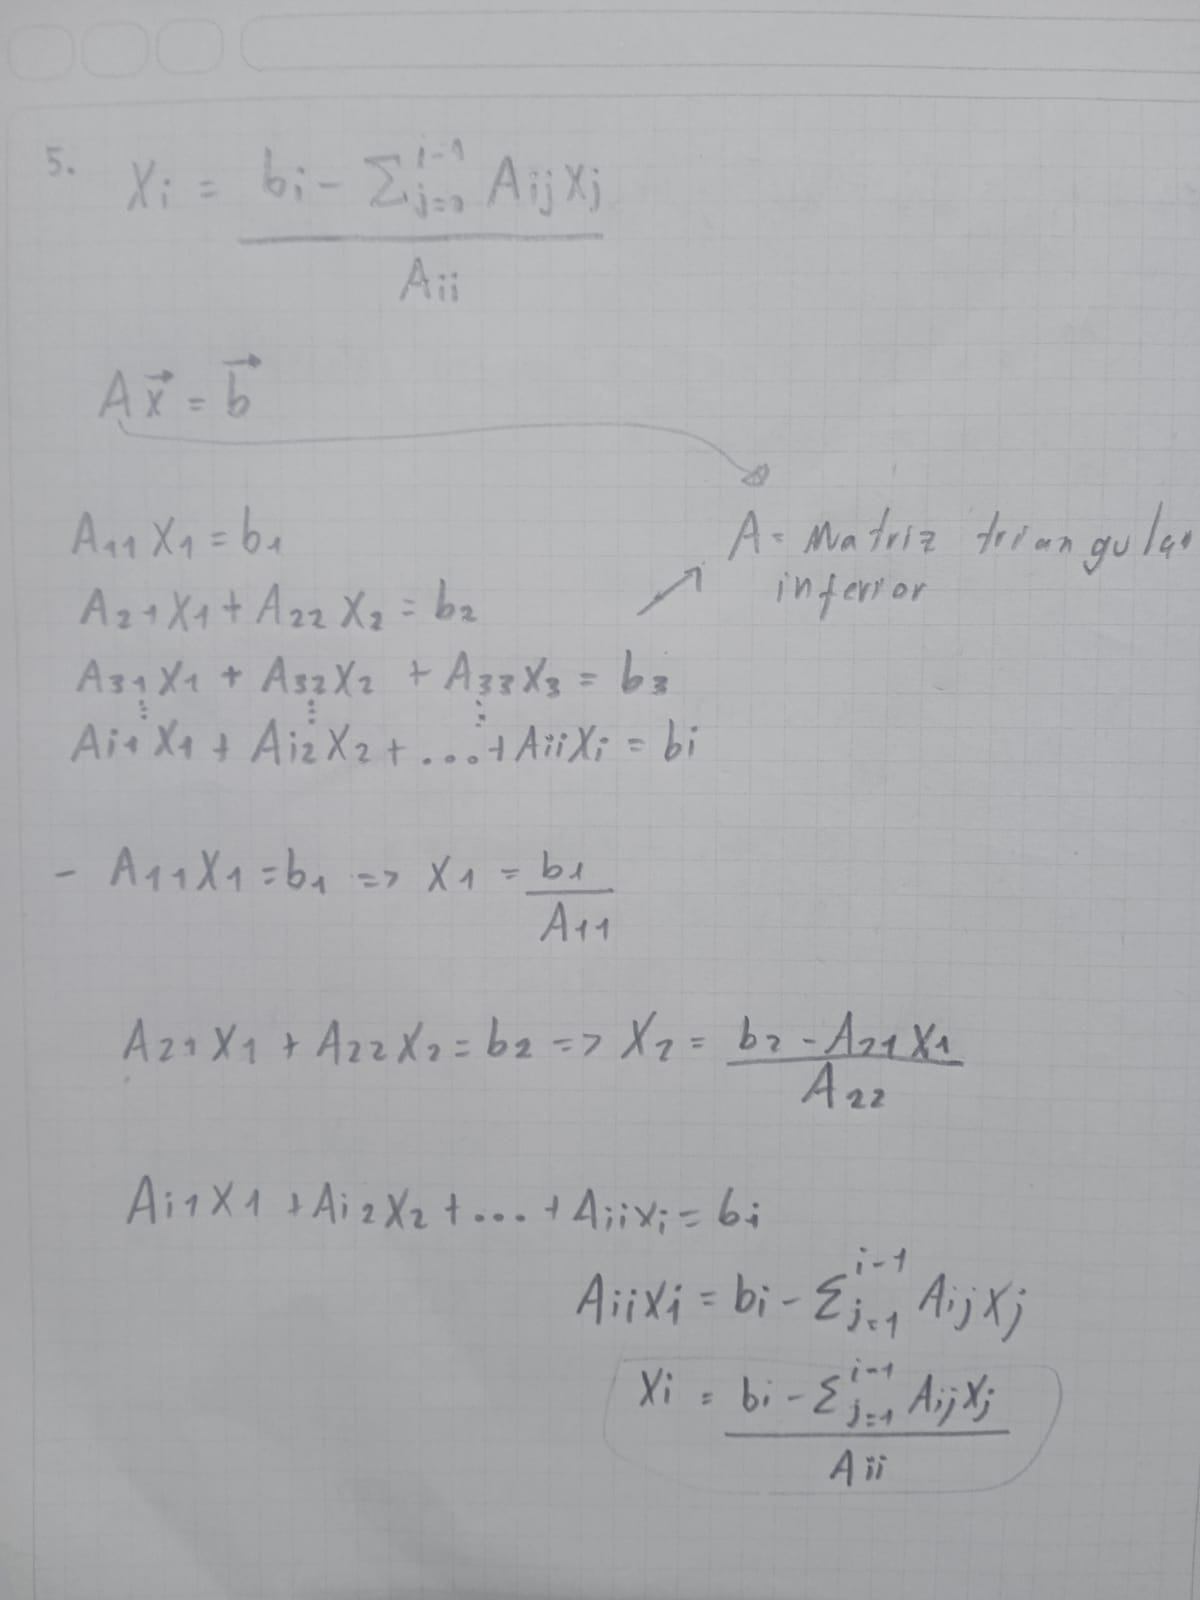

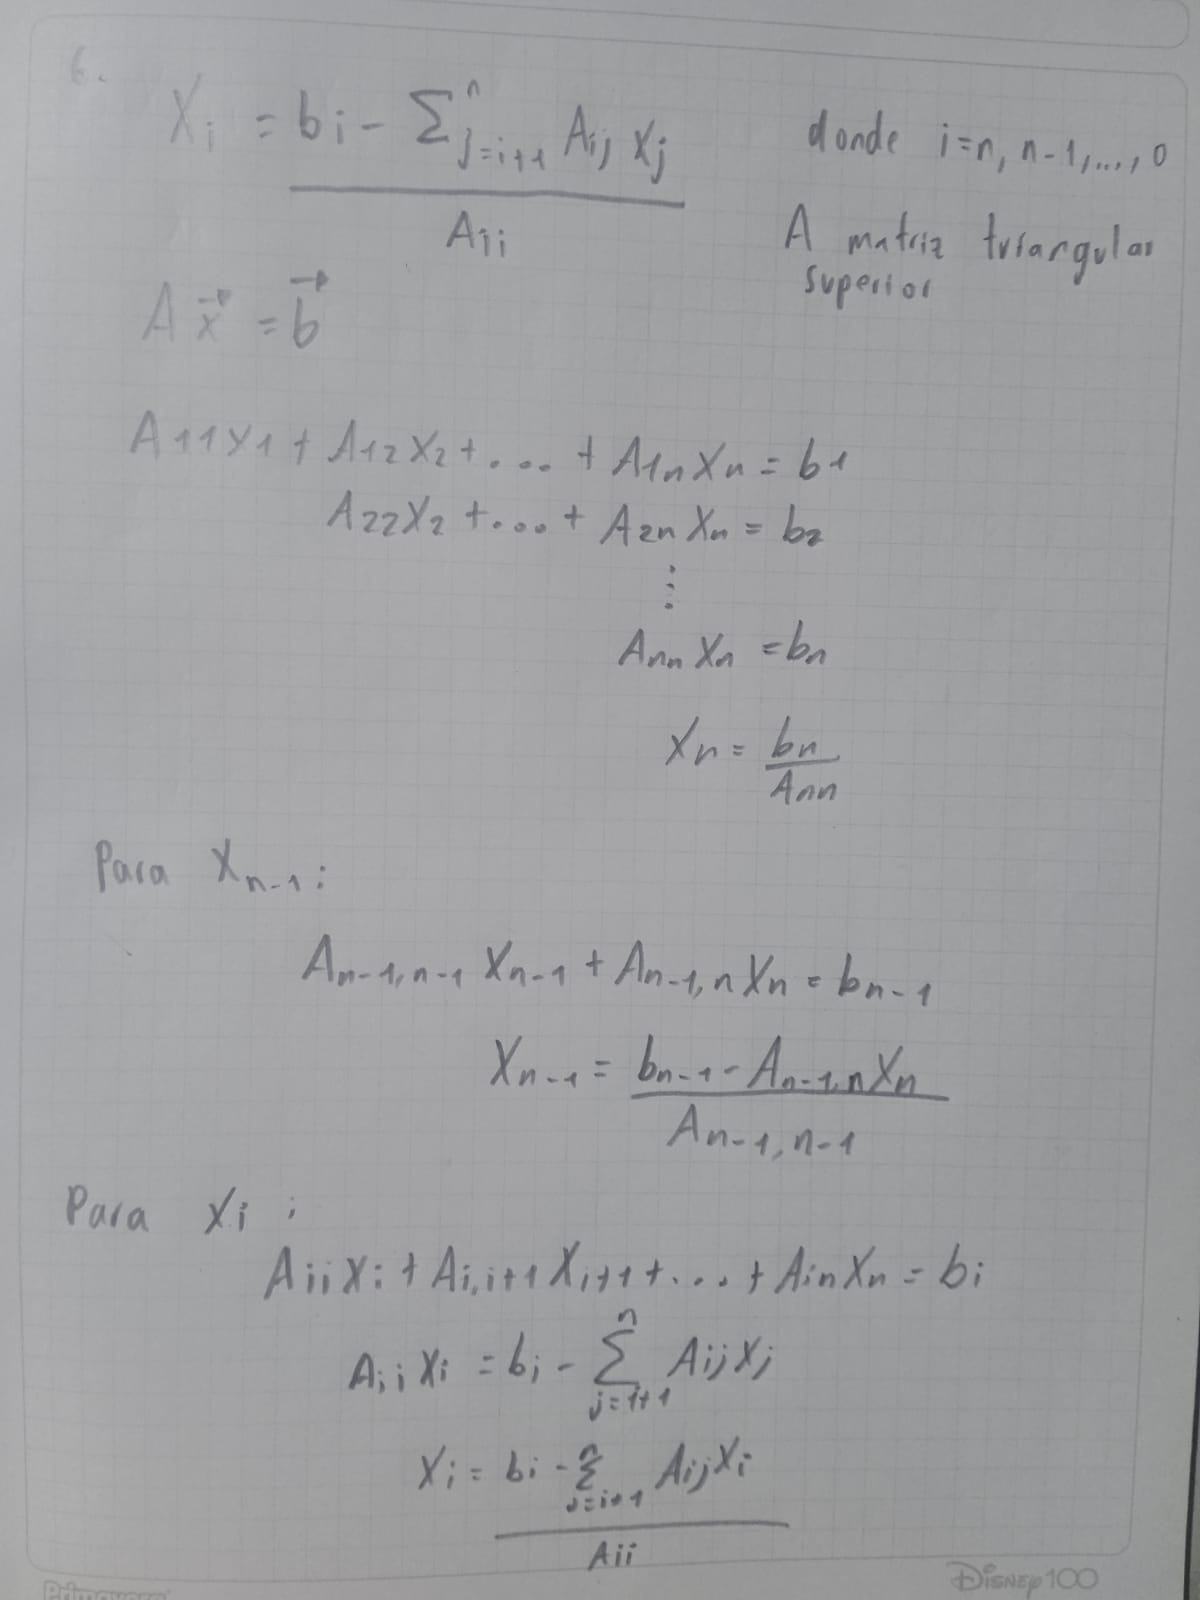

In [ ]:
#8
import numpy as np

L = np.array([
    [1, 0, 0],
    [5, 1, 0],
    [-2, 3, 1]
])

U = np.array([
    [4, -2, 1],
    [0, 3, 7],
    [0, 0, -2]
])

A_calculada = np.dot(L, U)
print("Matriz A calculada:")
print(A_calculada)

def descomposicion_LU(A):
    n = len(A)
    L = np.zeros_like(A, dtype=float)
    U = np.zeros_like(A, dtype=float)

    for i in range(n):
        L[i][i] = 1
        for j in range(i, n):
            suma_U = sum(L[i][k] * U[k][j] for k in range(i))
            U[i][j] = A[i][j] - suma_U
        for j in range(i+1, n):
            suma_L = sum(L[j][k] * U[k][i] for k in range(i))
            L[j][i] = (A[j][i] - suma_L) / U[i][i]

    return L, U
A = np.array([
    [4, -2, 1],
    [20, -7, 12],
    [-8, 13, 17]
])
L, U = descomposicion_LU(A)
print("Matriz L:")
print(L)
print("Matriz U:")
print(U)

Matriz A calculada:
[[ 4 -2  1]
 [20 -7 12]
 [-8 13 17]]
Matriz L:
[[ 1.  0.  0.]
 [ 5.  1.  0.]
 [-2.  3.  1.]]
Matriz U:
[[ 4. -2.  1.]
 [ 0.  3.  7.]
 [ 0.  0. -2.]]


In [ ]:
#10
import numpy as np

def jacobi_diagonalizacion(A, tol=1e-10, max_iter=100):
    n = A.shape[0]
    V = np.eye(n)
    A = np.array(A, dtype=float)

    def max_elemento_fuera_diagonal(A):
        n = A.shape[0]
        max_valor = 0
        p, q = 0, 1
        for i in range(n):
            for j in range(i+1, n):
                if abs(A[i, j]) > max_valor:
                    max_valor = abs(A[i, j])
                    p, q = i, j
        return p, q, max_valor

    iteraciones = 0
    while iteraciones < max_iter:
        p, q, max_valor = max_elemento_fuera_diagonal(A)
        if max_valor < tol:
            break
        a_pp, a_qq, a_pq = A[p, p], A[q, q], A[p, q]
        if a_pp == a_qq:
            theta = np.pi / 4
        else:
            theta = 0.5 * np.arctan2(2 * a_pq, a_pp - a_qq)
        cos_theta = np.cos(theta)
        sin_theta = np.sin(theta)
        R = np.eye(n)
        R[p, p] = cos_theta
        R[q, q] = cos_theta
        R[p, q] = -sin_theta
        R[q, p] = sin_theta
        A = R.T @ A @ R
        V = V @ R
        iteraciones += 1
    autovalores = np.diag(A)
    autovectores = V
    return autovalores, autovectores, iteraciones

A = np.array([
    [4, 1, 1],
    [1, 3, 2],
    [1, 2, 5]
])
autovalores_jacobi, autovectores_jacobi, iteraciones = jacobi_diagonalizacion(A)
print("Autovalores (Jacobi):")
print(autovalores_jacobi)
print("Autovectores (Jacobi):")
print(autovectores_jacobi)
print(f"Iteraciones: {iteraciones}")

#NUMPY
autovalores_numpy, autovectores_numpy = np.linalg.eig(A)


print("\nAutovalores (Numpy):")
print(autovalores_numpy)
print("Autovectores (Numpy):")
print(autovectores_numpy)

Autovalores (Jacobi):
[6.89510652 3.39729507 1.70759841]
Autovectores (Jacobi):
[[ 0.43170413 -0.88573564  0.17059871]
 [ 0.49725362  0.07589338 -0.86427949]
 [ 0.75257583  0.45794385  0.47319874]]
Iteraciones: 8

Autovalores (Numpy):
[6.89510652 3.39729507 1.70759841]
Autovectores (Numpy):
[[ 0.43170413  0.88573564  0.17059871]
 [ 0.49725362 -0.07589338 -0.86427949]
 [ 0.75257583 -0.45794385  0.47319874]]


In [ ]:
#13
def jacobiano_cuarto_orden(f, x, h=0.01):
    n = len(x)
    m = len(f(x))
    J = np.zeros((m, n))
    for i in range(n):
        x_h2_p = np.copy(x)
        x_h2_m = np.copy(x)
        x_h1_p = np.copy(x)
        x_h1_m = np.copy(x)
        x_h2_p[i] += 2 * h
        x_h2_m[i] -= 2 * h
        x_h1_p[i] += h
        x_h1_m[i] -= h
        f_h2_p = f(x_h2_p)
        f_h2_m = f(x_h2_m)
        f_h1_p = f(x_h1_p)
        f_h1_m = f(x_h1_m)
        J[:, i] = (-f_h2_p + 8 * f_h1_p - 8 * f_h1_m + f_h2_m) / (12 * h)
    return J

def f(x):
    return np.array([
        4 * x[0] + x[1] + x[2],
        x[0] + 3 * x[1] + 2 * x[2],
        x[0] + 2 * x[1] + 5 * x[2]
    ])

x0 = np.array([0.5, 0.5, 0.5])
J_cuarto_orden = jacobiano_cuarto_orden(f, x0, h=0.01)
print("Jacobiano de cuarto orden en el punto (0.5, 0.5, 0.5):")
print(J_cuarto_orden)

def jacobiano_segundo_orden(f, x, h=0.01):
    n = len(x)
    m = len(f(x))
    J = np.zeros((m, n))
    for i in range(n):
        x_h_p = np.copy(x)
        x_h_m = np.copy(x)
        x_h_p[i] += h
        x_h_m[i] -= h
        f_h_p = f(x_h_p)
        f_h_m = f(x_h_m)
        J[:, i] = (f_h_p - f_h_m) / (2 * h)
    return J

J_segundo_orden = jacobiano_segundo_orden(f, x0, h=0.01)
print("\nJacobiano de segundo orden en el punto (0.5, 0.5, 0.5):")
print(J_segundo_orden)

def comparar_precision(f, x, h_vals):
    for h in h_vals:
        J_cuarto = jacobiano_cuarto_orden(f, x, h=h)
        J_segundo = jacobiano_segundo_orden(f, x, h=h)
        error_relativo = np.linalg.norm(J_cuarto - J_segundo) / np.linalg.norm(J_cuarto)
        print(f"h = {h:.5f}, error relativo entre O(h^2) y O(h^4): {error_relativo:.5e}")


h_values = np.logspace(-5, -1, 10)
comparar_precision(f, x0, h_values)

Jacobiano de cuarto orden en el punto (0.5, 0.5, 0.5):
[[4. 1. 1.]
 [1. 3. 2.]
 [1. 2. 5.]]

Jacobiano de segundo orden en el punto (0.5, 0.5, 0.5):
[[4. 1. 1.]
 [1. 3. 2.]
 [1. 2. 5.]]
h = 0.00001, error relativo entre O(h^2) y O(h^4): 3.96024e-12
h = 0.00003, error relativo entre O(h^2) y O(h^4): 1.43321e-12
h = 0.00008, error relativo entre O(h^2) y O(h^4): 5.29240e-13
h = 0.00022, error relativo entre O(h^2) y O(h^4): 2.10415e-13
h = 0.00060, error relativo entre O(h^2) y O(h^4): 5.86656e-14
h = 0.00167, error relativo entre O(h^2) y O(h^4): 2.47451e-14
h = 0.00464, error relativo entre O(h^2) y O(h^4): 9.16886e-15
h = 0.01292, error relativo entre O(h^2) y O(h^4): 3.99053e-15
h = 0.03594, error relativo entre O(h^2) y O(h^4): 1.12269e-15
h = 0.10000, error relativo entre O(h^2) y O(h^4): 4.46990e-16


In [4]:
#14
import sympy as sp

Jx = sp.Matrix([[0, 0, 0], [0, 0, -1], [0, 1, 0]])
Jy = sp.Matrix([[0, 0, 1], [0, 0, 0], [-1, 0, 0]])
Jz = sp.Matrix([[0, -1, 0], [1, 0, 0], [0, 0, 0]])

def conmutador(A, B):
    return A * B - B * A

comm_Jx_Jy = conmutador(Jx, Jy)
comm_Jy_Jz = conmutador(Jy, Jz)
comm_Jz_Jx = conmutador(Jz, Jx)

print(comm_Jx_Jy)
print(comm_Jy_Jz)
print(comm_Jz_Jx)

Matrix([[0, -1, 0], [1, 0, 0], [0, 0, 0]])
Matrix([[0, 0, 0], [0, 0, -1], [0, 1, 0]])
Matrix([[0, 0, 1], [0, 0, 0], [-1, 0, 0]])
